# Basic image I/O

In [115]:
import cv2
from matplotlib import pyplot as plt
from scipy import signal

## 1. Using openCV and Matplotlib

In [129]:
img = cv2.imread('police1.jpg')
print (type(img))

<class 'numpy.ndarray'>


openCV reads image as numpy n-dimension(nd)array.

In [130]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

You need to convert BRG to RGB
Matplotlib expects image in RGB format but OpenCV provides it in BGR.

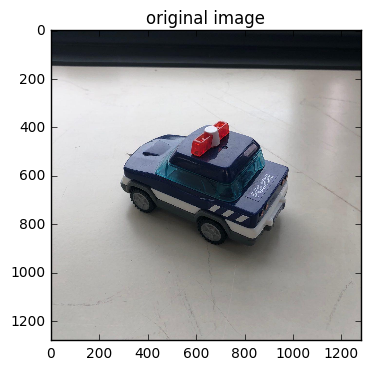

In [131]:
plt.imshow(RGB_img)
plt.title('original image')
plt.show()

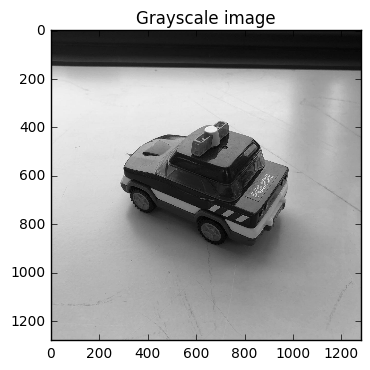

In [132]:
plt.imshow(GRAY_img, cmap='gray')
plt.title('Grayscale image')
plt.show()

Here ! You can see the image above!

# 2. Basic Gaussian Convolution Filter

In this example you can make the basic 3x3 gaussian convolution filter

In [133]:
import numpy as np

In [136]:
filter_img = cv2.imread('filter_example.tif')
GRAY_img = cv2.cvtColor(filter_img, cv2.COLOR_BGR2GRAY)


In [137]:
conv_filter = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
print(conv_filter)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


We are going to use this 3x3 filter.

### First, we use grayscale image for simplicity.

In [138]:
convolved_image = signal.convolve2d(GRAY_img, conv_filter, mode='same')

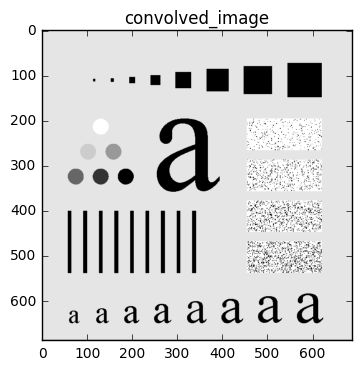

In [139]:
plt.imshow(convolved_image, cmap='gray')
plt.title('convolved_image')
plt.show()

Hmm... it seems that it doesn't change any...  
Let's try 5x5 Gaussian filter (blur).

In [140]:
conv_filter2 = np.array([[1/256, 4/256, 6/256, 4/256, 1/256],[4/256, 16/256, 24/256, 16/256, 4/256],[6/256, 24/256, 36/256, 24/256, 6/256],[4/256, 16/256, 24/256, 16/256, 4/256],[1/256, 4/256, 6/256, 4/256, 1/256]])
print(conv_filter2)

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


Sorry for long code...

In [141]:
convolved_image2 = signal.convolve2d(GRAY_img, conv_filter2, mode='same')

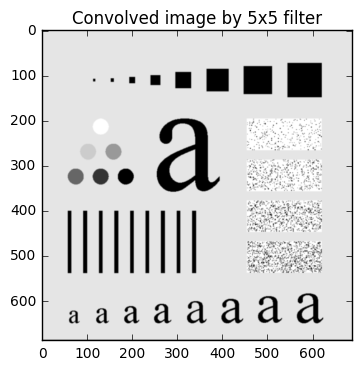

In [142]:
plt.imshow(convolved_image2,  cmap='gray')
plt.title('Convolved image by 5x5 filter')
plt.show()

In [143]:
difference_image = convolved_image - GRAY_img

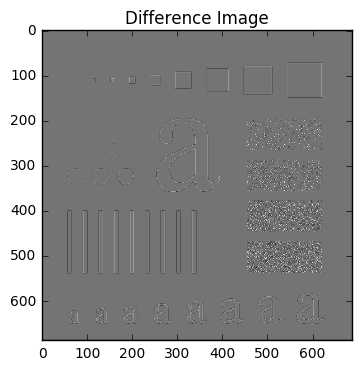

In [144]:
plt.imshow(difference_image, cmap='gray')
plt.title('Difference Image')
plt.show()

Now it can be seen the 'diffence' well.

# 3. Difference of Gaussian